# Credit Card Fraud Detection - Classification Model Comparison

## Project Overview
This notebook compares multiple classification models for detecting fraudulent credit card transactions. The dataset is highly imbalanced, making it an excellent test case for various classification algorithms.

**Dataset**: Credit Card Fraud Detection from Kaggle (MLG-ULB)

**Models Evaluated**:
1. Logistic Regression (Baseline)
2. Gradient Boosting
3. Decision Tree
4. Naive Bayes
5. Support Vector Machine

## Section 1: Exploratory Data Analysis and Data Preprocessing

This section is divided into two parts:
- **1.1**: Exploratory Data Analysis
- **1.2**: Data Preprocessing Pipeline

### Section 1.1: Exploratory Data Analysis

In this section, we will:
- Load the dataset
- Examine the dataset structure and dimensions
- Generate statistical summaries
- Analyze class distribution
- Identify missing values
- Detect outliers
- Visualize feature distributions
- Create correlation matrices

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


c:\Users\aicunningham\.pyenv\pyenv-win\versions\3.12.7\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download and load the Credit Card Fraud Detection dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print(f"Dataset downloaded to: {path}")

# Find the CSV file in the downloaded path
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

# Load the dataset
df = pd.read_csv(csv_file)
print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset downloaded to: C:\Users\aicunningham\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3

Dataset loaded successfully!
Shape: (284807, 31)


#### 1.1.1 Dataset Structure and Basic Information

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Dataset information
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [5]:
# Check data types
print("\nData Types:")
print("="*50)
print(df.dtypes.value_counts())


Data Types:
float64    30
int64       1
Name: count, dtype: int64


#### 1.1.2 Statistical Summary

In [6]:
# Statistical summary of all features
print("Statistical Summary:")
print("="*50)
display(df.describe().T)

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


#### 1.1.3 Missing Value Analysis

In [7]:
# Check for missing values
print("Missing Values Analysis:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("No missing values found in the dataset!")

Missing Values Analysis:
No missing values found in the dataset!


#### 1.1.4 Class Distribution Analysis

In [8]:
# Class distribution
print("Class Distribution:")
print("="*50)
class_dist = df['Class'].value_counts()
print(class_dist)
print(f"\nClass Distribution (%):\n{df['Class'].value_counts(normalize=True) * 100}")
print(f"\nImbalance Ratio: 1:{class_dist[0]/class_dist[1]:.2f}")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (%):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Imbalance Ratio: 1:577.88


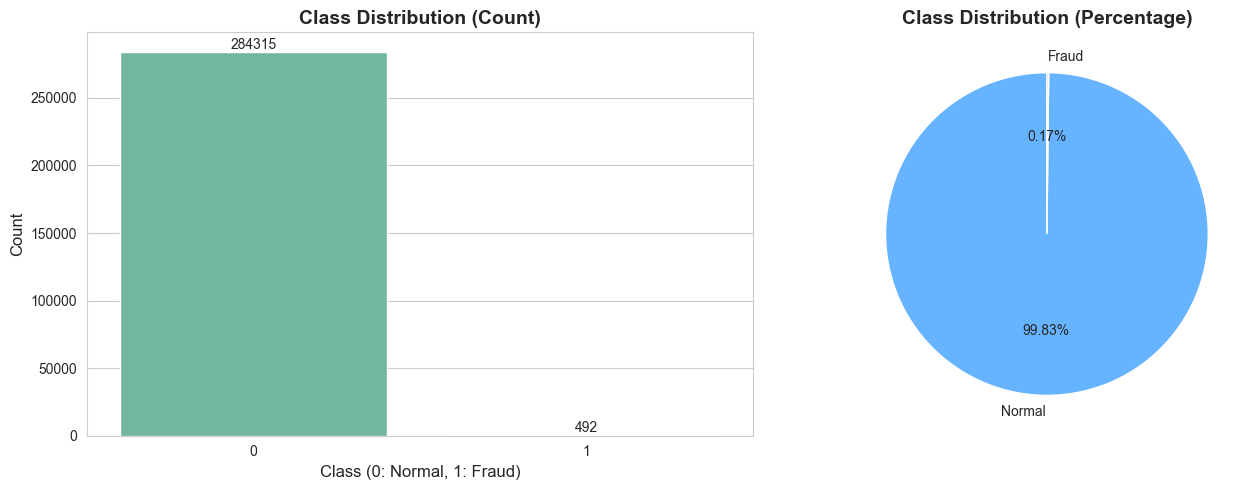

Visualization saved to: visualizations/class_distribution.png


In [9]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Class', ax=axes[0], palette='Set2')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Normal, 1: Fraud)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
class_counts = df['Class'].value_counts()
colors = ['#66b3ff', '#ff9999']
axes[1].pie(class_counts, labels=['Normal', 'Fraud'], autopct='%1.2f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('visualizations/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/class_distribution.png")

#### 1.1.5 Feature Distribution Analysis

In [10]:
# Analyze Time and Amount features (non-PCA features)
print("Distribution of Time and Amount features:")
print("="*50)

# Time feature
print("\nTime Feature Statistics:")
print(df['Time'].describe())

# Amount feature
print("\nAmount Feature Statistics:")
print(df['Amount'].describe())

Distribution of Time and Amount features:

Time Feature Statistics:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Amount Feature Statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


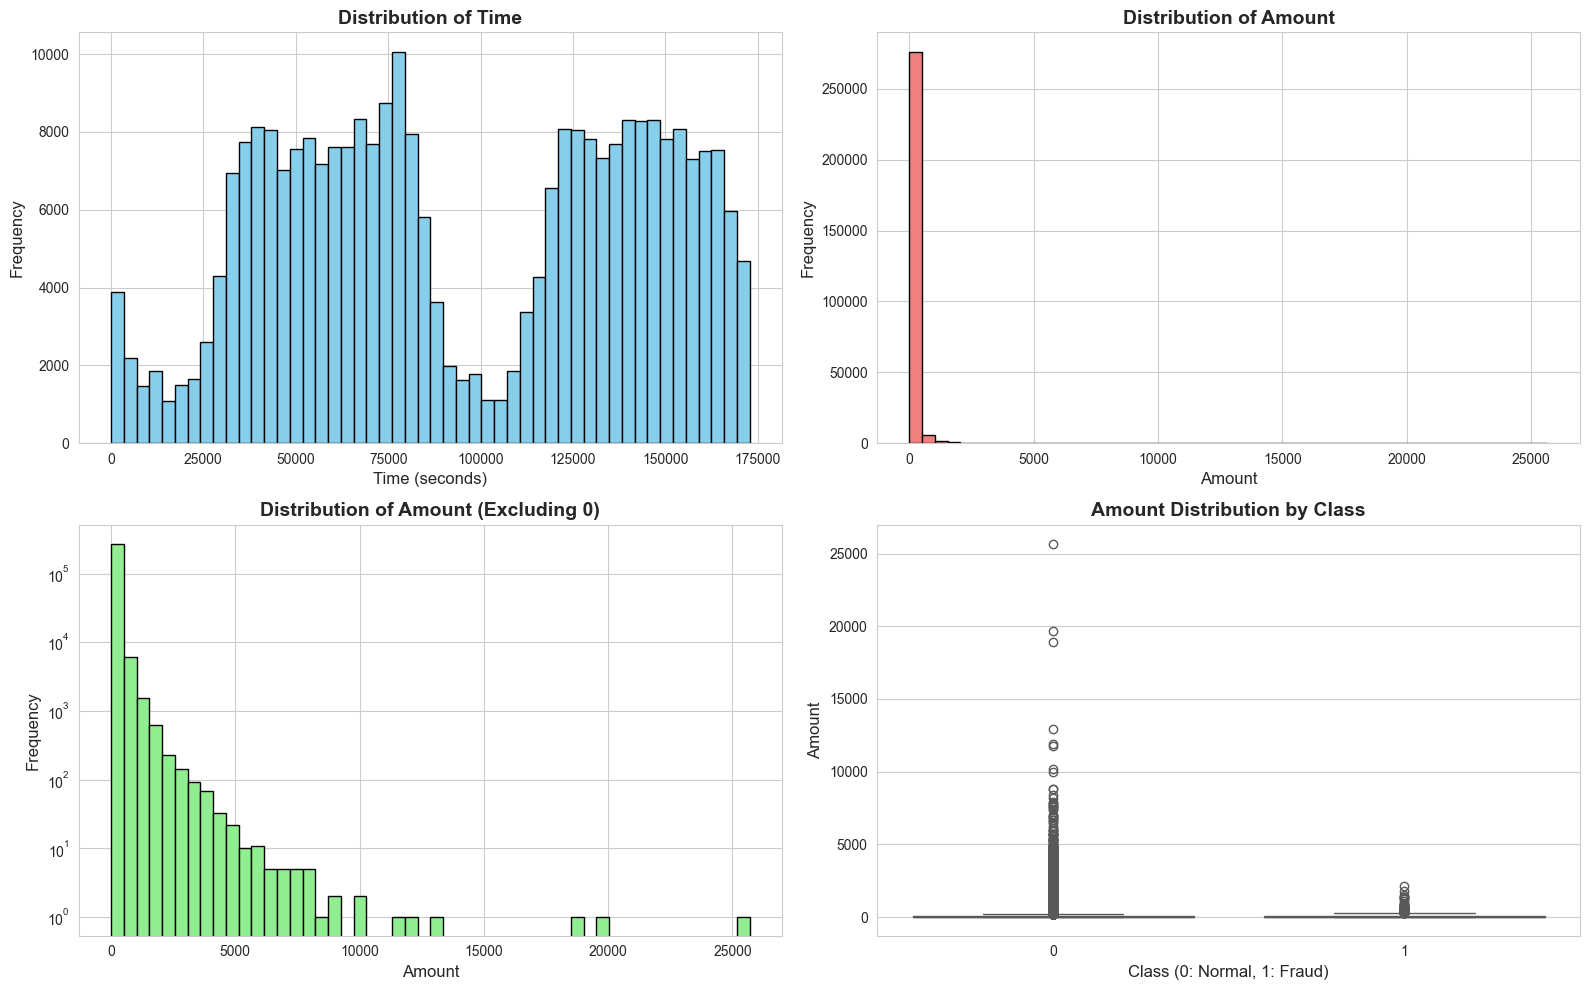

Visualization saved to: visualizations/time_amount_distribution.png


In [11]:
# Visualize Time and Amount distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time distribution
axes[0, 0].hist(df['Time'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time (seconds)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Amount distribution
axes[0, 1].hist(df['Amount'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Amount', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Amount', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Amount distribution (log scale for better visualization)
axes[1, 0].hist(df[df['Amount'] > 0]['Amount'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution of Amount (Excluding 0)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Amount', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_yscale('log')

# Box plot for Amount by Class
sns.boxplot(data=df, x='Class', y='Amount', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Amount Distribution by Class', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Class (0: Normal, 1: Fraud)', fontsize=12)
axes[1, 1].set_ylabel('Amount', fontsize=12)

plt.tight_layout()
plt.savefig('visualizations/time_amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/time_amount_distribution.png")

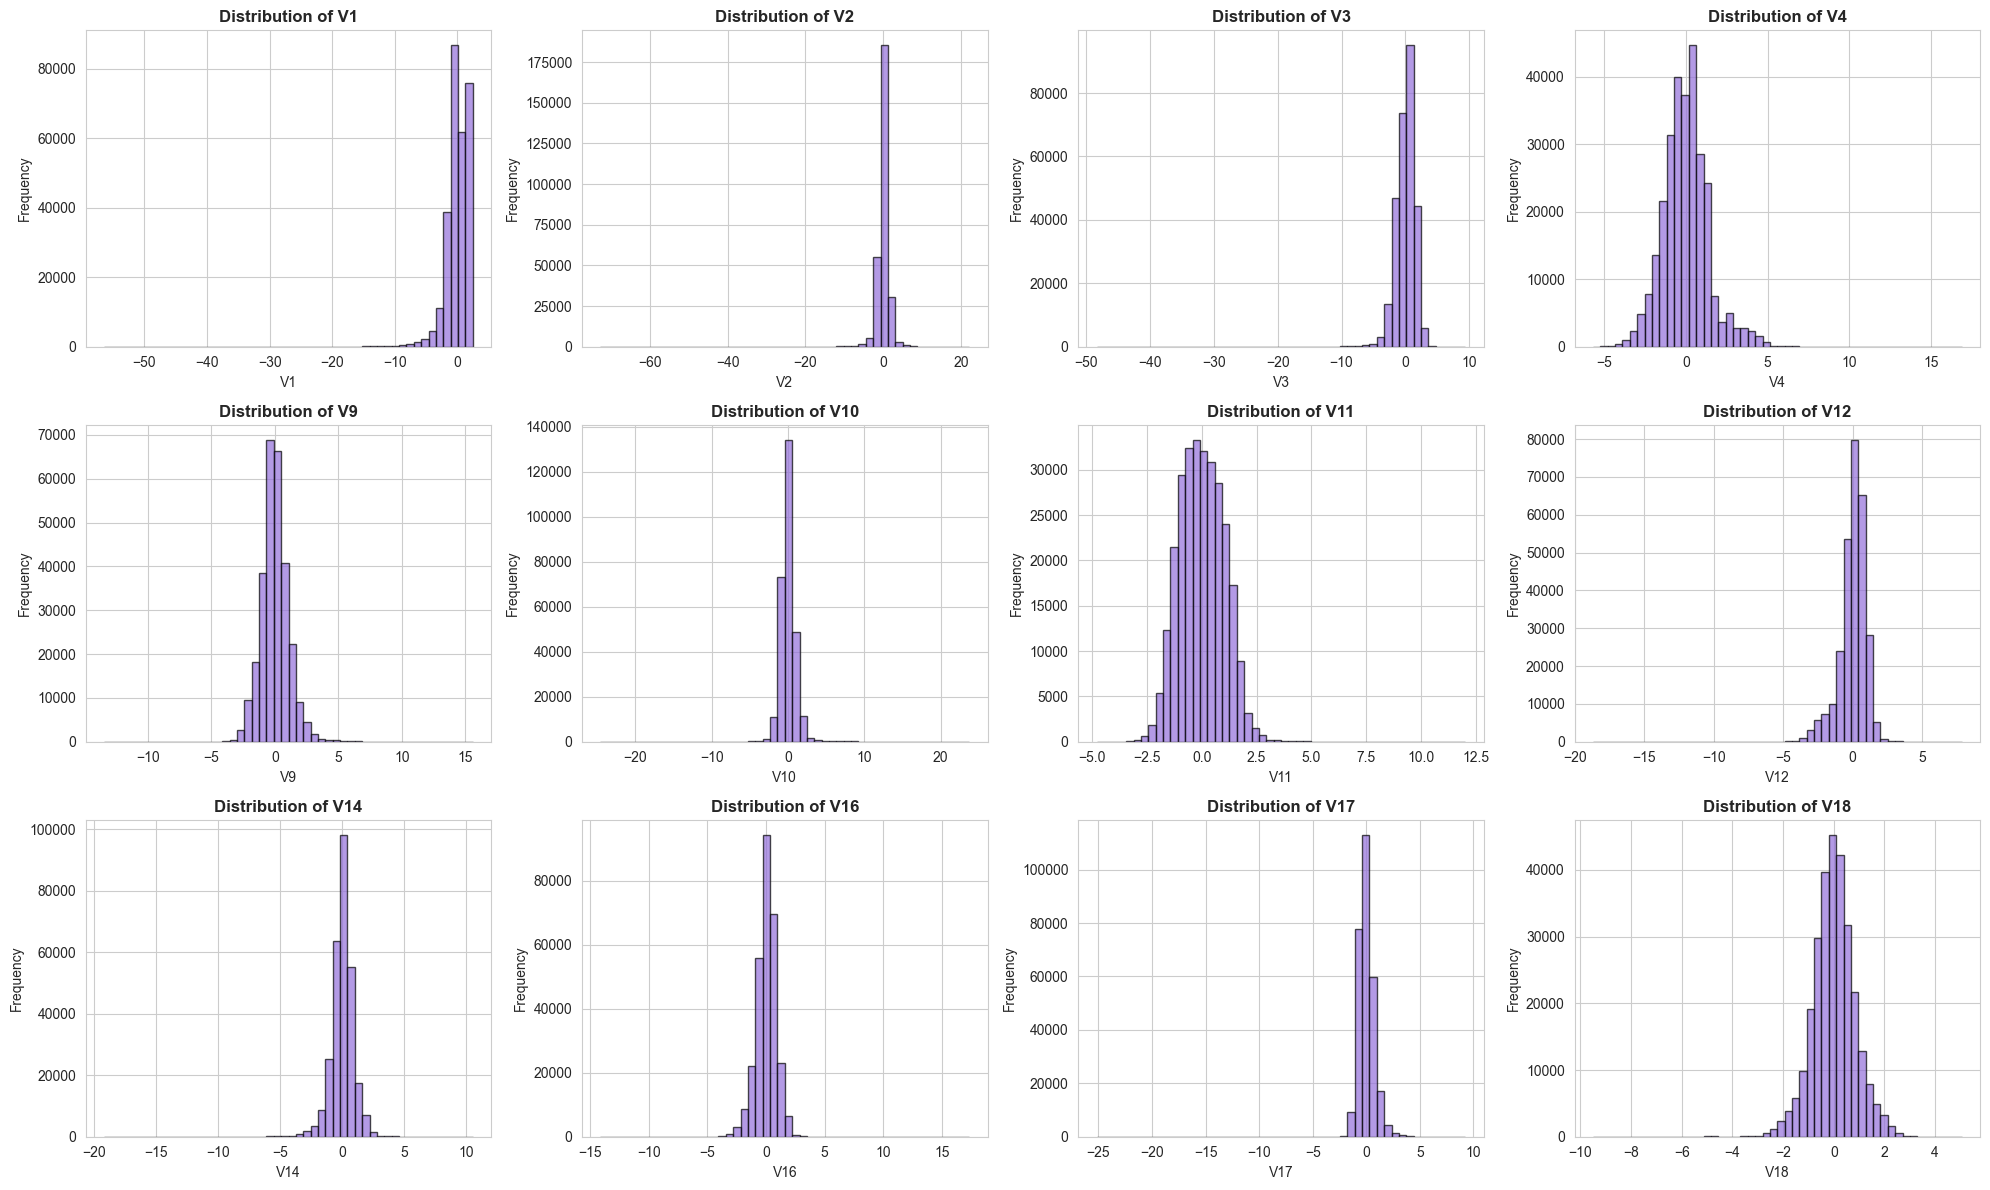

Visualization saved to: visualizations/pca_features_distribution.png


In [12]:
# Distribution of key PCA features (V1-V28)
pca_features = [col for col in df.columns if col.startswith('V')]

# Select a few key PCA features for visualization
key_features = ['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[feature], bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.savefig('visualizations/pca_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/pca_features_distribution.png")

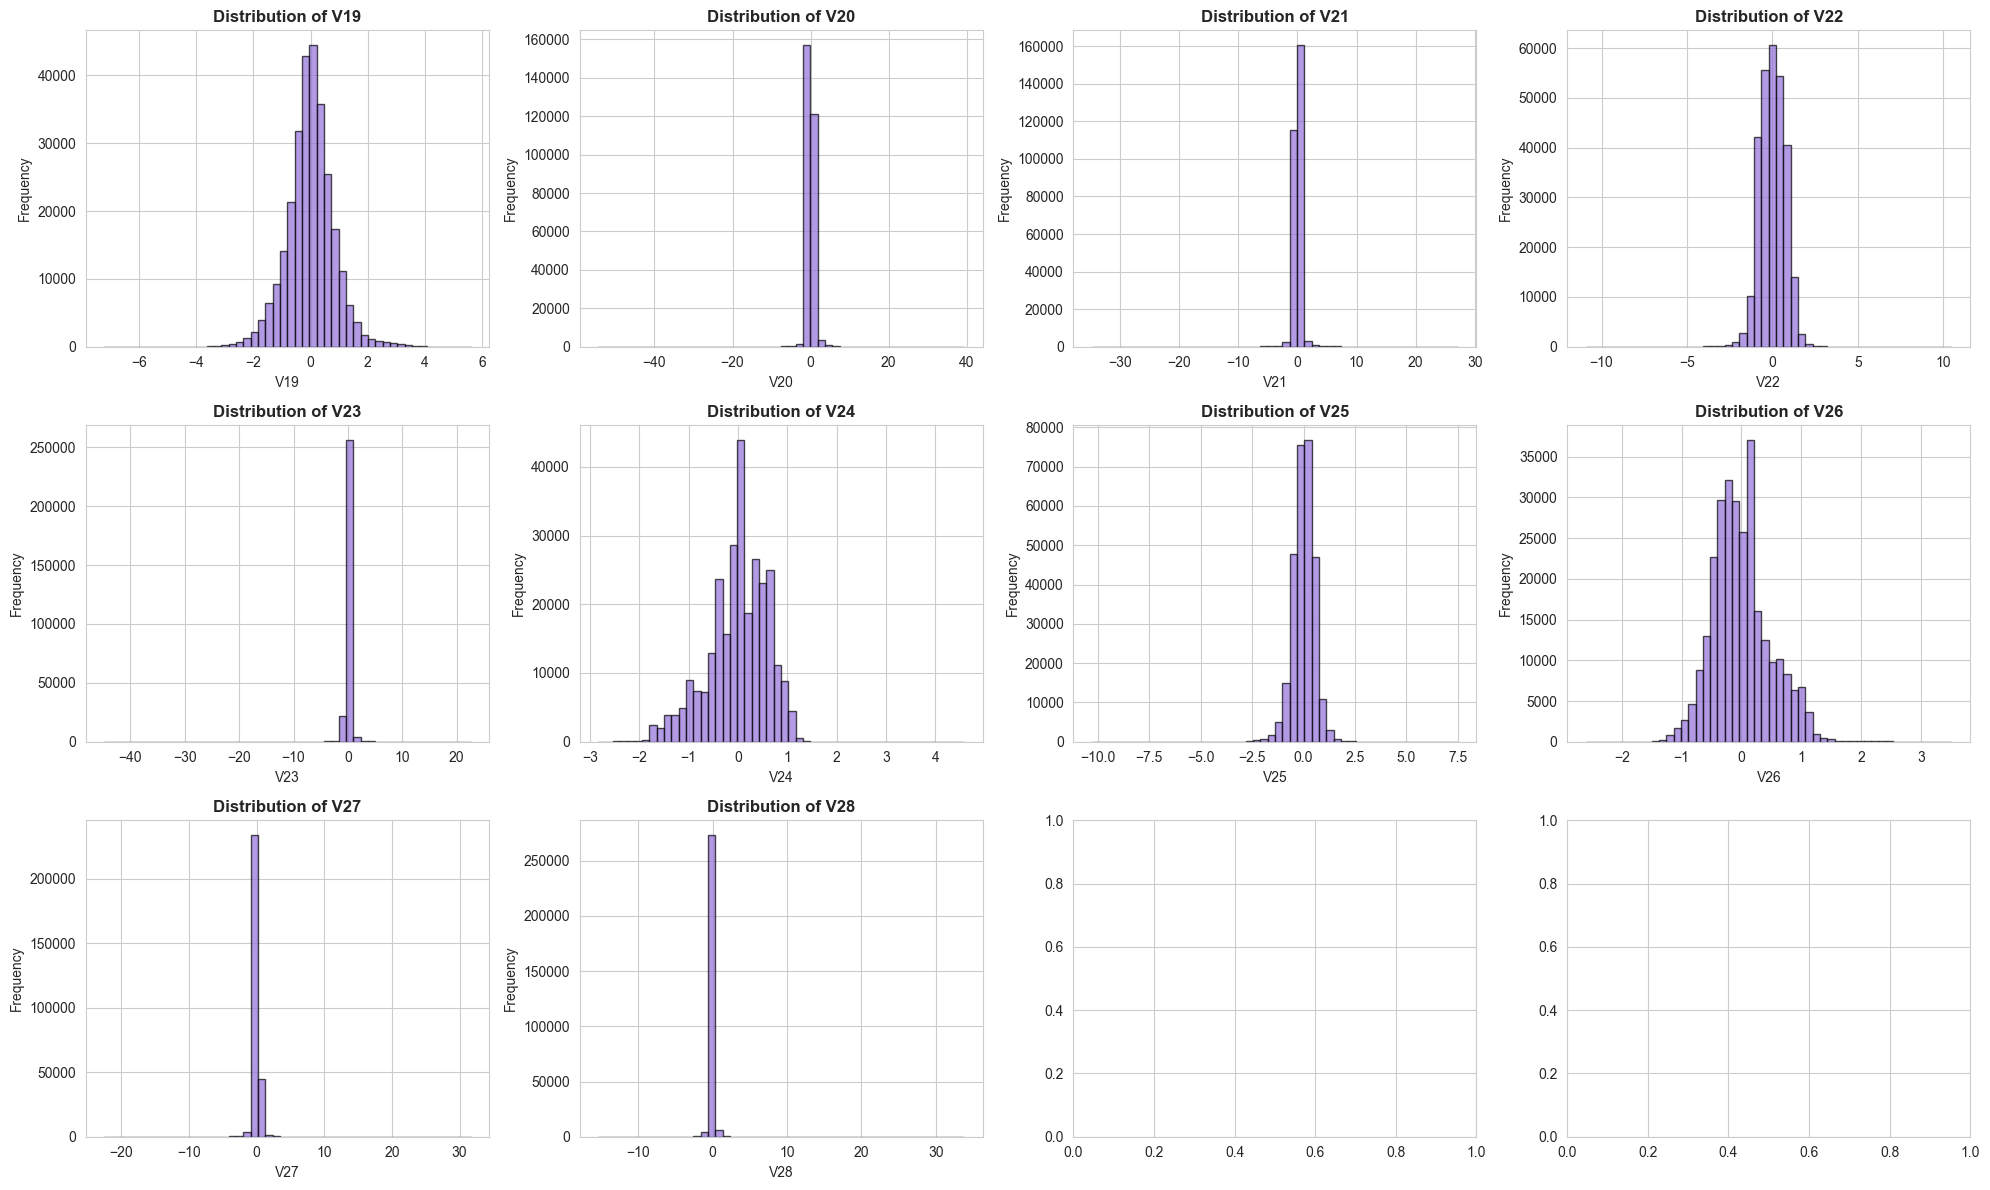

Visualization saved to: visualizations/pca_features_distribution2.png


In [13]:
# Distribution of key PCA features (V1-V28)
pca_features = [col for col in df.columns if col.startswith('V')]

# Select a few key PCA features for visualization
key_features = ['V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[feature], bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.savefig('visualizations/pca_features_distribution2.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/pca_features_distribution2.png")

#### 1.1.6 Outlier Detection

In [14]:
# Identify outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(df)) * 100

print("Outlier Analysis (IQR Method):")
print("="*60)

outlier_summary = []
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Class')  # Exclude target variable

for col in numeric_columns:
    outlier_count, outlier_pct = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier %': round(outlier_pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier Count', ascending=False)
display(outlier_df.head(31))

Outlier Analysis (IQR Method):


,Feature,Outlier Count,Outlier %
27,V27,39163,13.75
29,Amount,31904,11.20
28,V28,30342,10.65
20,V20,27770,9.75
8,V8,24134,8.47
6,V6,22965,8.06
23,V23,18541,6.51
12,V12,15348,5.39
21,V21,14497,5.09
14,V14,14149,4.97


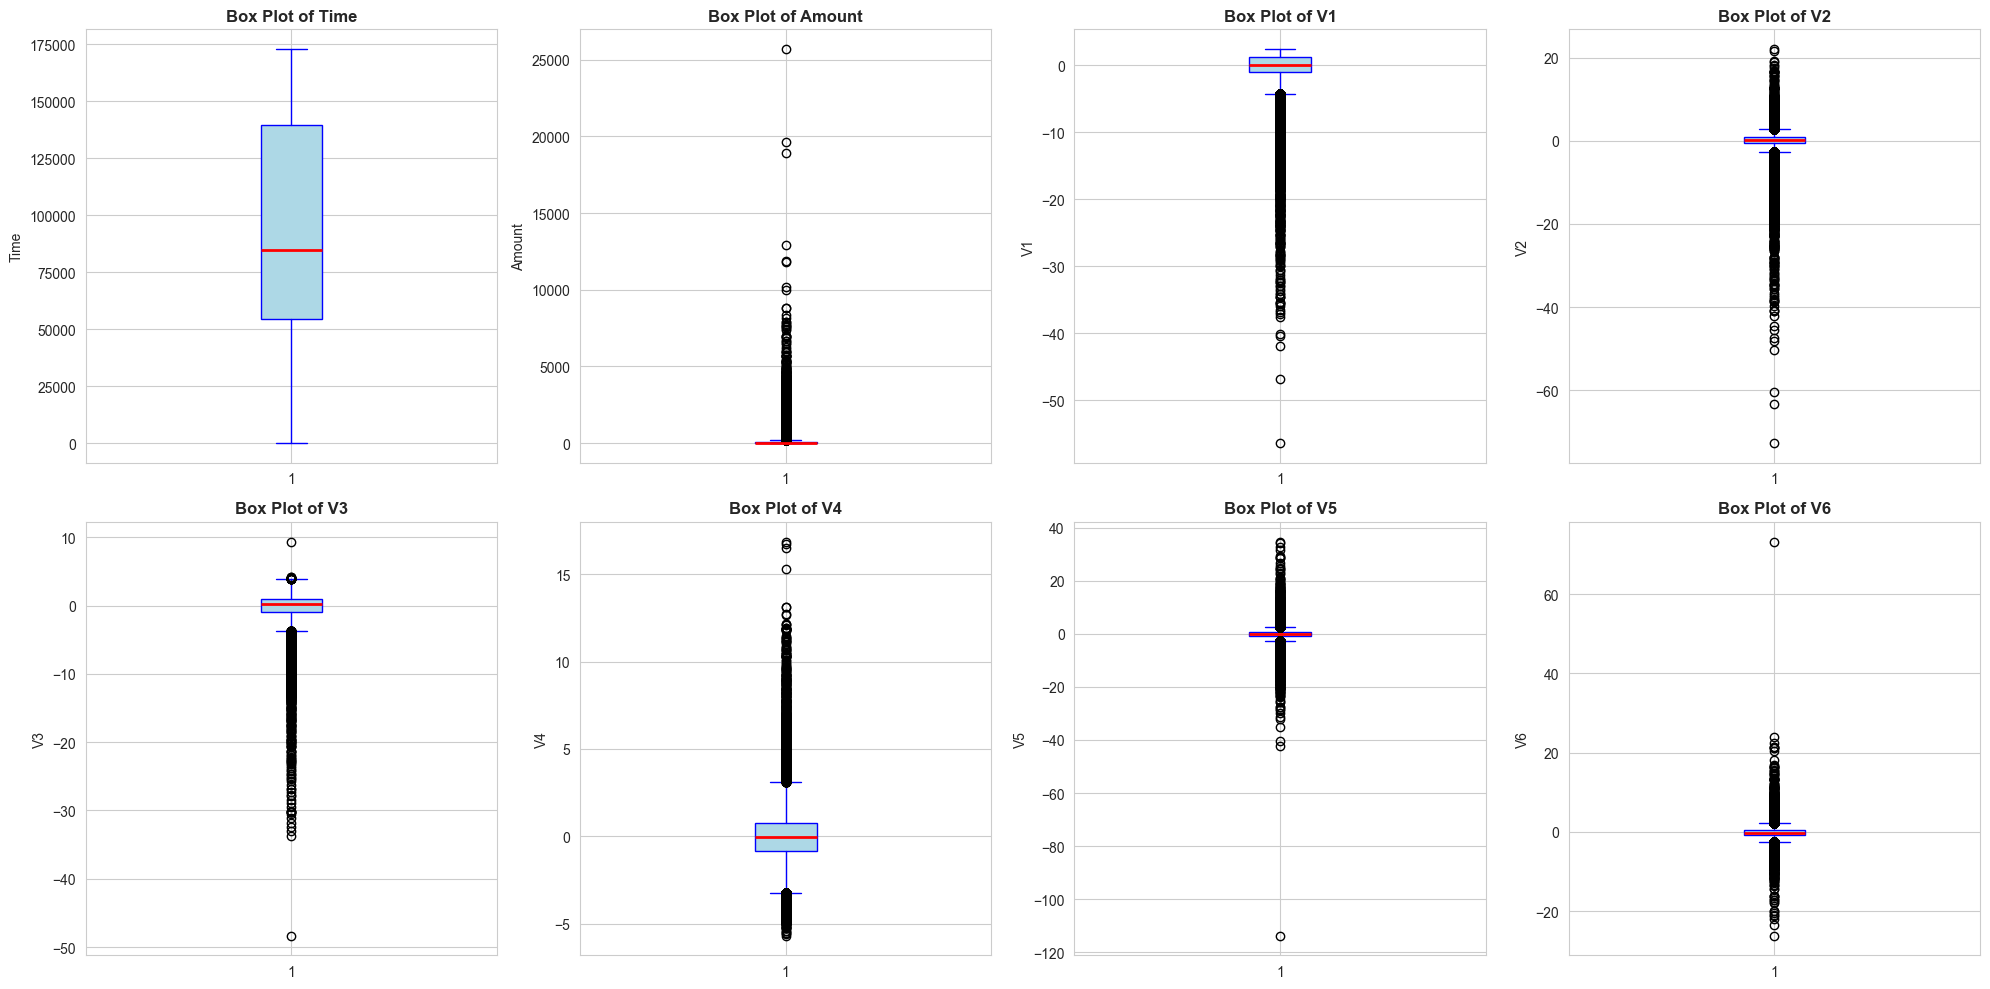

Visualization saved to: visualizations/outlier_boxplots.png


In [15]:
# Visualize outliers for key features using box plots
key_features_outlier = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features_outlier):
    axes[idx].boxplot(df[feature], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'))
    axes[idx].set_title(f'Box Plot of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10)

plt.tight_layout()
plt.savefig('visualizations/outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/outlier_boxplots.png")

#### 1.1.7 Correlation Analysis

In [16]:
# Correlation matrix for all features
correlation_matrix = df.corr()

# Correlation with target variable (Class)
print("Features Most Correlated with Fraud (Class):")
print("="*60)
target_correlation = correlation_matrix['Class'].sort_values(ascending=False)
print(target_correlation)

Features Most Correlated with Fraud (Class):
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


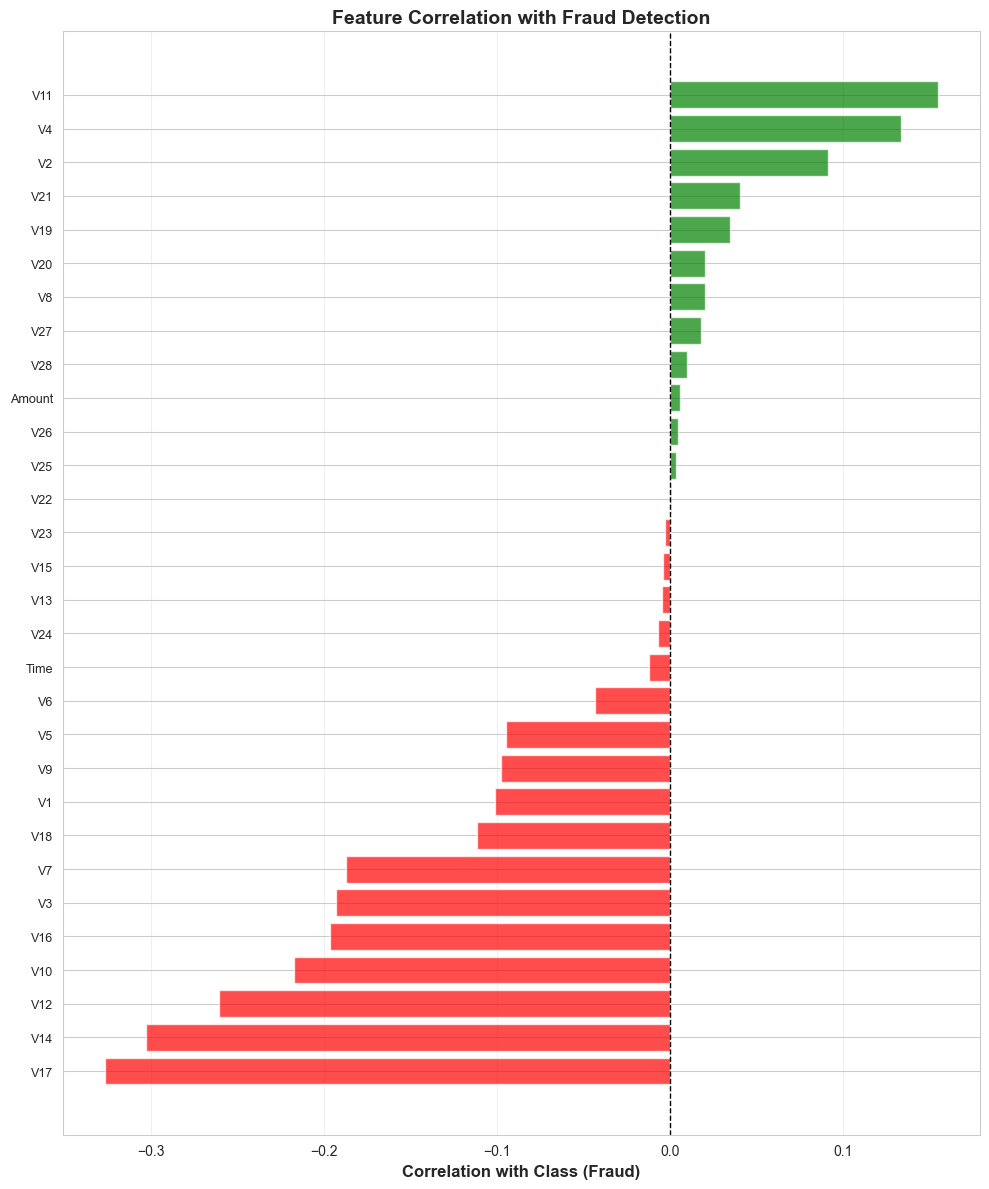

Visualization saved to: visualizations/feature_correlation_with_fraud.png


In [17]:
# Visualize correlation with target variable
plt.figure(figsize=(10, 12))
target_corr = correlation_matrix['Class'].drop('Class').sort_values(ascending=True)
colors = ['red' if x < 0 else 'green' for x in target_corr]

plt.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(target_corr)), target_corr.index, fontsize=9)
plt.xlabel('Correlation with Class (Fraud)', fontsize=12, fontweight='bold')
plt.title('Feature Correlation with Fraud Detection', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/feature_correlation_with_fraud.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/feature_correlation_with_fraud.png")

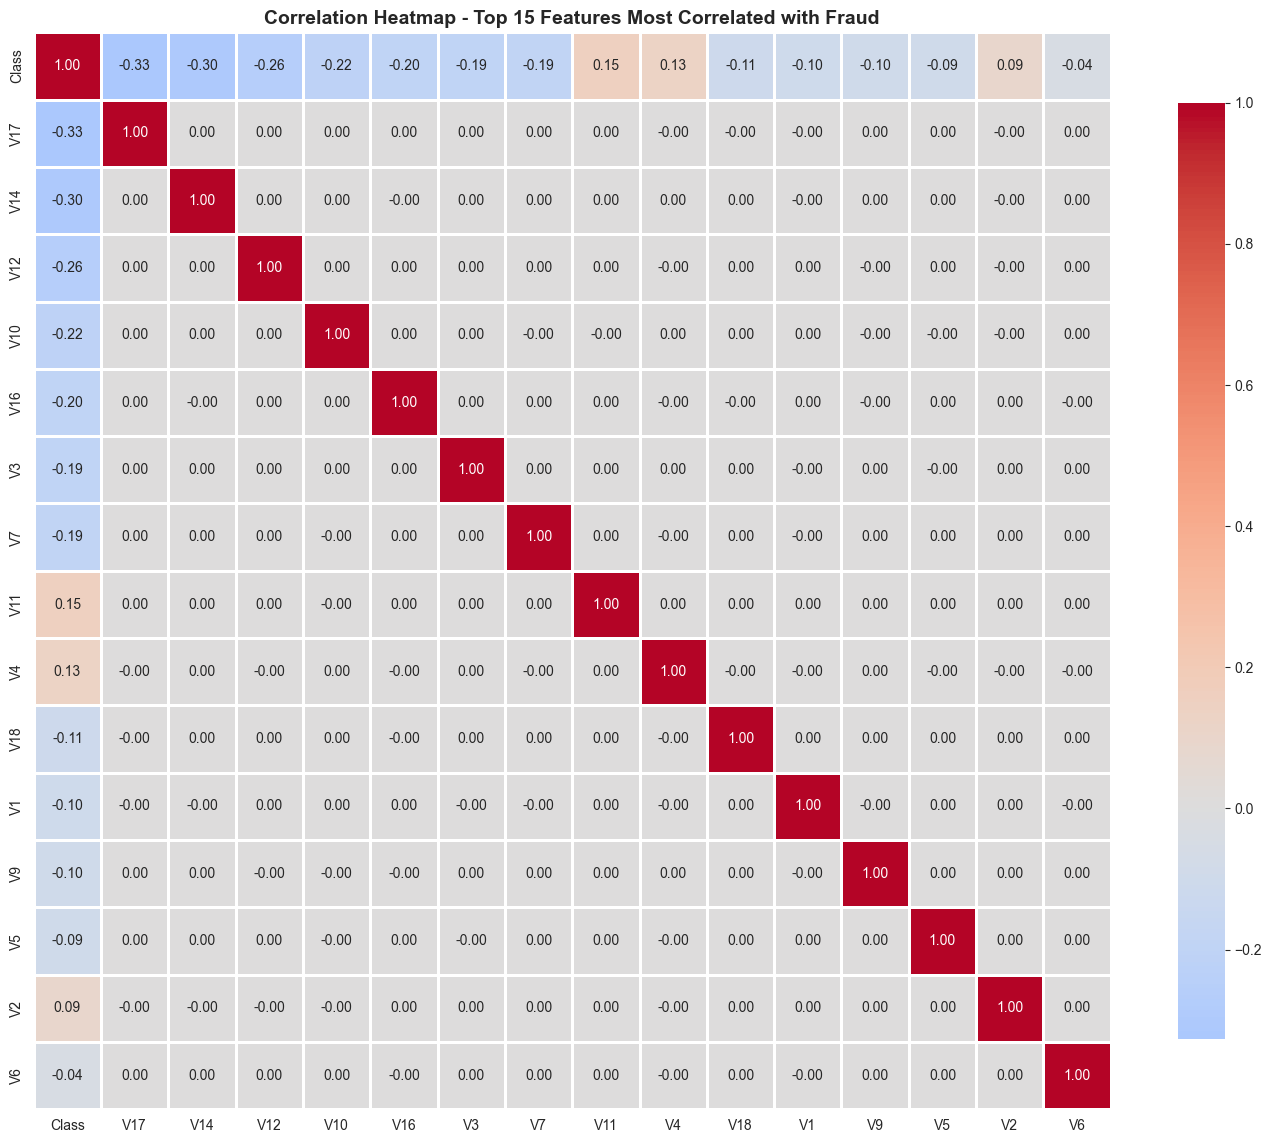

Visualization saved to: visualizations/correlation_heatmap.png


In [18]:
# Full correlation heatmap (showing subset for readability)
# Select top correlated features with fraud
top_features = target_correlation.abs().sort_values(ascending=False).head(16).index.tolist()

plt.figure(figsize=(14, 12))
sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top 15 Features Most Correlated with Fraud', 
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/correlation_heatmap.png")

#### 1.1.8 Categorical Feature Analysis

In [19]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Features Analysis:")
print("="*60)

if len(categorical_features) > 0:
    for feature in categorical_features:
        print(f"\n{feature}:")
        print(f"  Unique values: {df[feature].nunique()}")
        print(f"  Value counts:")
        print(df[feature].value_counts())
else:
    print("No categorical features found. All features are numerical.")
    print("\nNote: This dataset consists of PCA-transformed features (V1-V28),")
    print("      Time, Amount, and the binary Class label.")

Categorical Features Analysis:
No categorical features found. All features are numerical.

Note: This dataset consists of PCA-transformed features (V1-V28),
      Time, Amount, and the binary Class label.


##### 1.1.8.1 Pairwise Feature Scatter Plots

Visualizing pairs of features to identify separability between normal and fraudulent transactions.

In [20]:
# Create sample dataset for scatter plots (due to large dataset size)
# Sample more fraud cases to ensure visibility in plots
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0].sample(n=5000, random_state=42)
sample_df = pd.concat([normal_df, fraud_df]).sample(frac=1, random_state=42)

print(f"Sampled dataset for scatter plots:")
print(f"  Normal transactions: {len(normal_df)}")
print(f"  Fraudulent transactions: {len(fraud_df)}")
print(f"  Total samples: {len(sample_df)}")

# Define color mapping
colors = sample_df['Class'].map({0: 'green', 1: 'red'})
class_labels = sample_df['Class'].map({0: 'Normal', 1: 'Fraud'})

Sampled dataset for scatter plots:
  Normal transactions: 5000
  Fraudulent transactions: 492
  Total samples: 5492


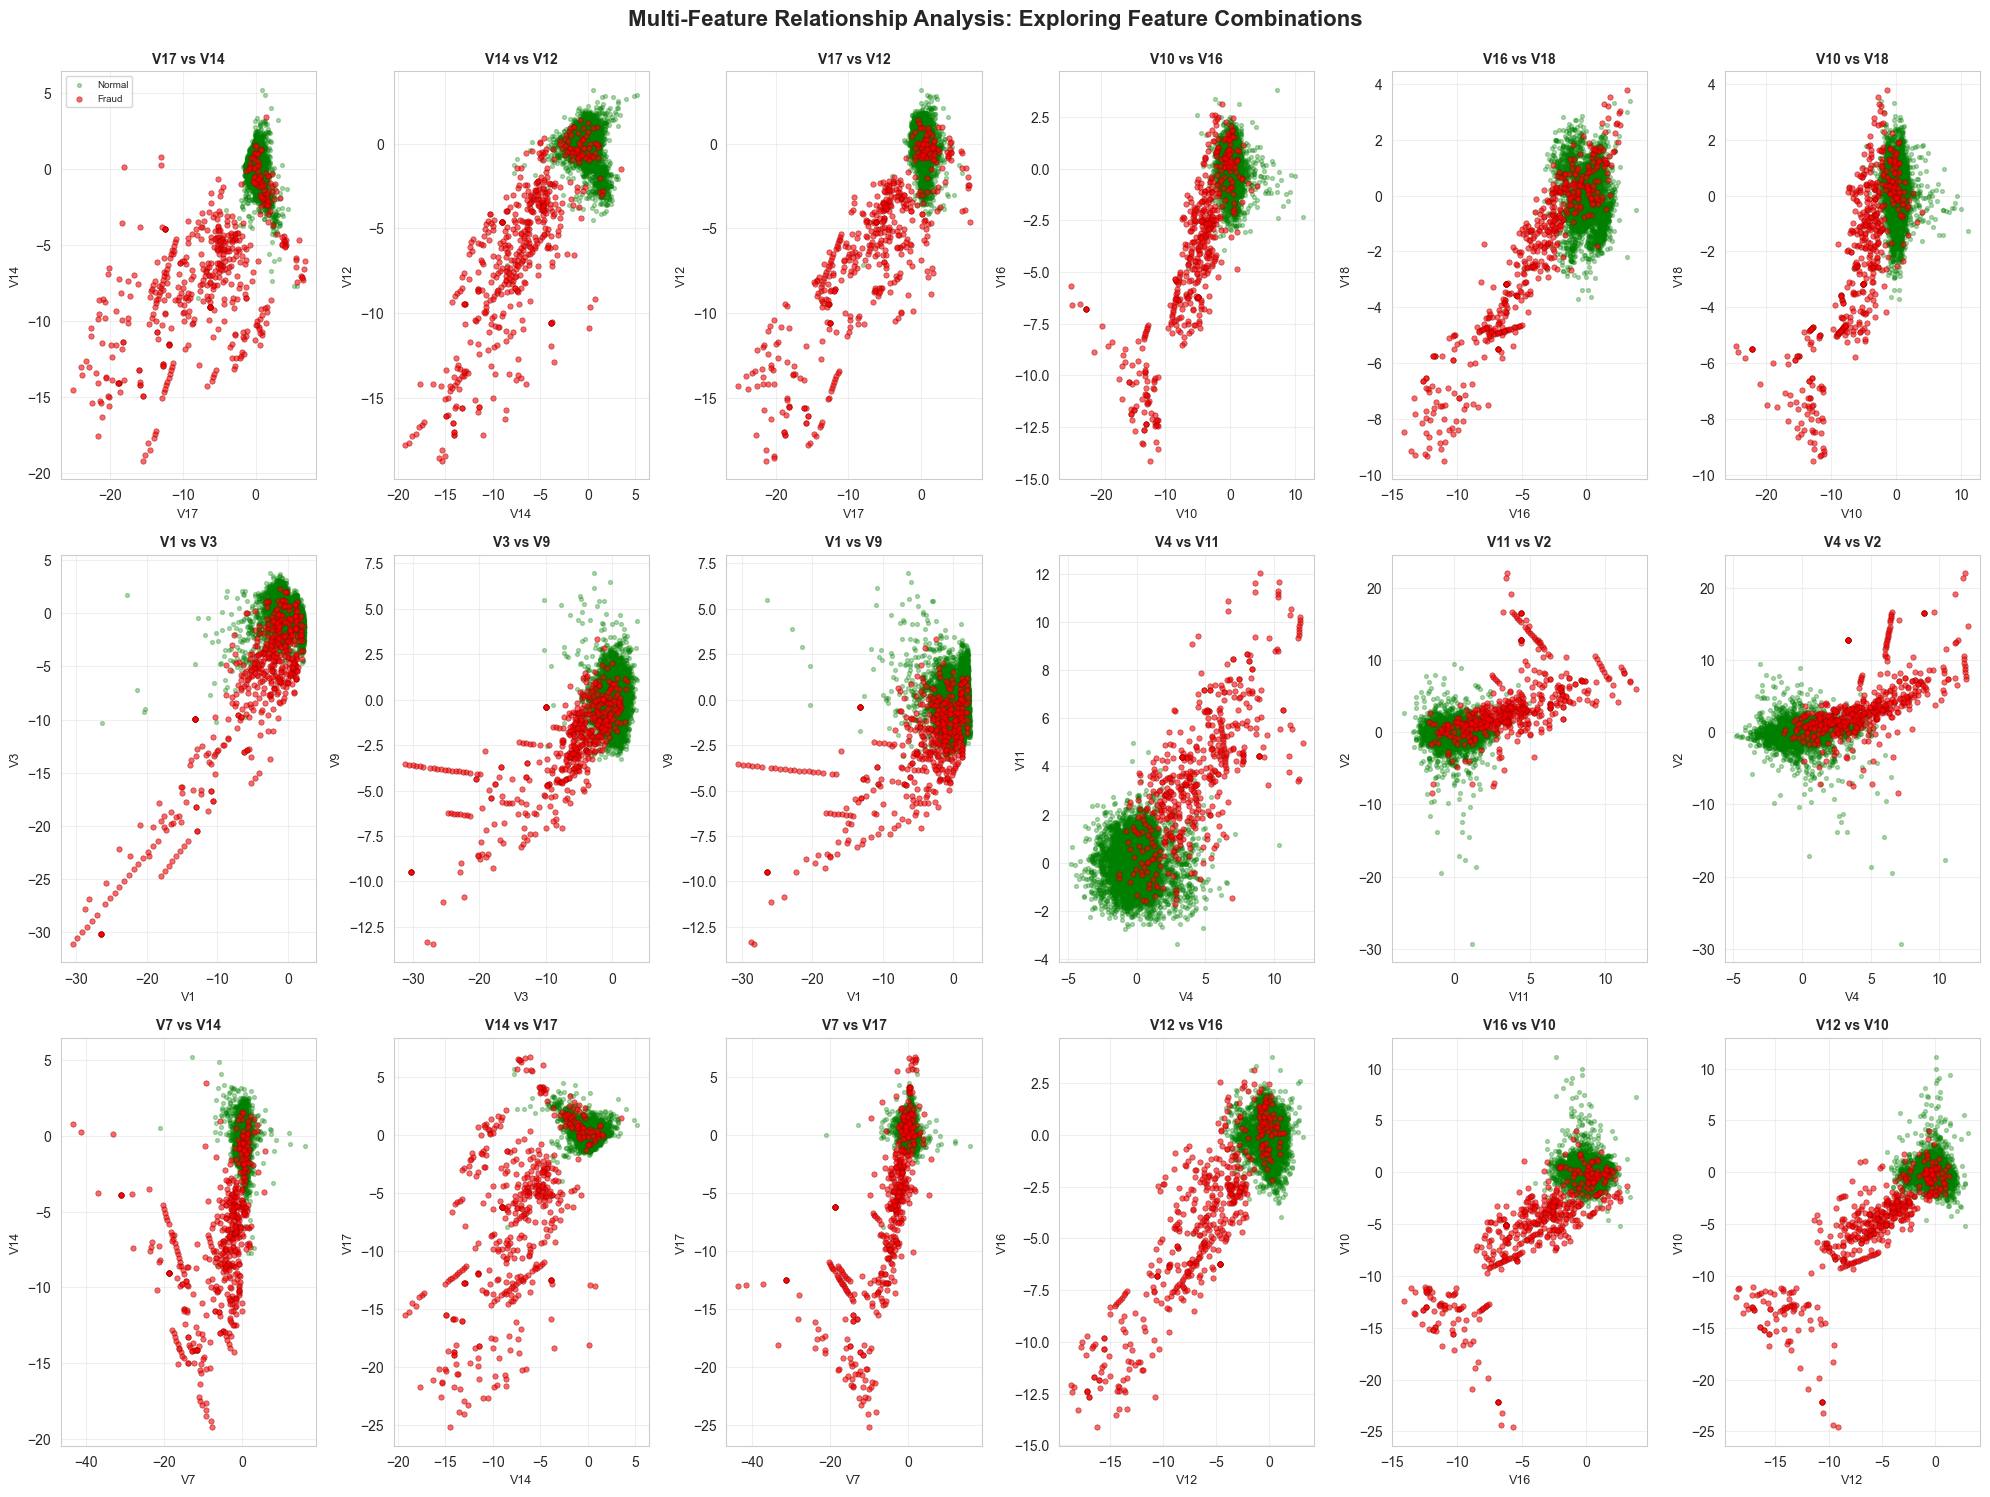

Visualization saved to: visualizations/multi_feature_scatter_combinations.png


In [21]:
# Additional scatter plots showing 3D-like relationships using subplots
# Focusing on features with strong negative correlation to fraud

fig = plt.figure(figsize=(20, 15))

# Create a 3x3 grid of scatter plots with different feature combinations
feature_combinations = [
    ('V17', 'V14', 'V12'),
    ('V10', 'V16', 'V18'),
    ('V1', 'V3', 'V9'),
    ('V4', 'V11', 'V2'),
    ('V7', 'V14', 'V17'),
    ('V12', 'V16', 'V10'),
]

for idx, (f1, f2, f3) in enumerate(feature_combinations, 1):
    # First subplot: f1 vs f2
    ax1 = plt.subplot(3, 6, (idx-1)*3 + 1)
    normal_mask = sample_df['Class'] == 0
    fraud_mask = sample_df['Class'] == 1
    
    ax1.scatter(sample_df[normal_mask][f1], sample_df[normal_mask][f2],
               c='green', alpha=0.3, s=8, label='Normal')
    ax1.scatter(sample_df[fraud_mask][f1], sample_df[fraud_mask][f2],
               c='red', alpha=0.6, s=15, label='Fraud', edgecolors='darkred', linewidths=0.5)
    ax1.set_xlabel(f1, fontsize=9)
    ax1.set_ylabel(f2, fontsize=9)
    ax1.set_title(f'{f1} vs {f2}', fontsize=10, fontweight='bold')
    if idx == 1:
        ax1.legend(loc='best', fontsize=7)
    ax1.grid(True, alpha=0.3)
    
    # Second subplot: f2 vs f3
    ax2 = plt.subplot(3, 6, (idx-1)*3 + 2)
    ax2.scatter(sample_df[normal_mask][f2], sample_df[normal_mask][f3],
               c='green', alpha=0.3, s=8)
    ax2.scatter(sample_df[fraud_mask][f2], sample_df[fraud_mask][f3],
               c='red', alpha=0.6, s=15, edgecolors='darkred', linewidths=0.5)
    ax2.set_xlabel(f2, fontsize=9)
    ax2.set_ylabel(f3, fontsize=9)
    ax2.set_title(f'{f2} vs {f3}', fontsize=10, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Third subplot: f1 vs f3
    ax3 = plt.subplot(3, 6, (idx-1)*3 + 3)
    ax3.scatter(sample_df[normal_mask][f1], sample_df[normal_mask][f3],
               c='green', alpha=0.3, s=8)
    ax3.scatter(sample_df[fraud_mask][f1], sample_df[fraud_mask][f3],
               c='red', alpha=0.6, s=15, edgecolors='darkred', linewidths=0.5)
    ax3.set_xlabel(f1, fontsize=9)
    ax3.set_ylabel(f3, fontsize=9)
    ax3.set_title(f'{f1} vs {f3}', fontsize=10, fontweight='bold')
    ax3.grid(True, alpha=0.3)

plt.suptitle('Multi-Feature Relationship Analysis: Exploring Feature Combinations', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('visualizations/multi_feature_scatter_combinations.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/multi_feature_scatter_combinations.png")

Creating pair plot for top 5 features most correlated with fraud...
Features: V17, V14, V12, V10, V16


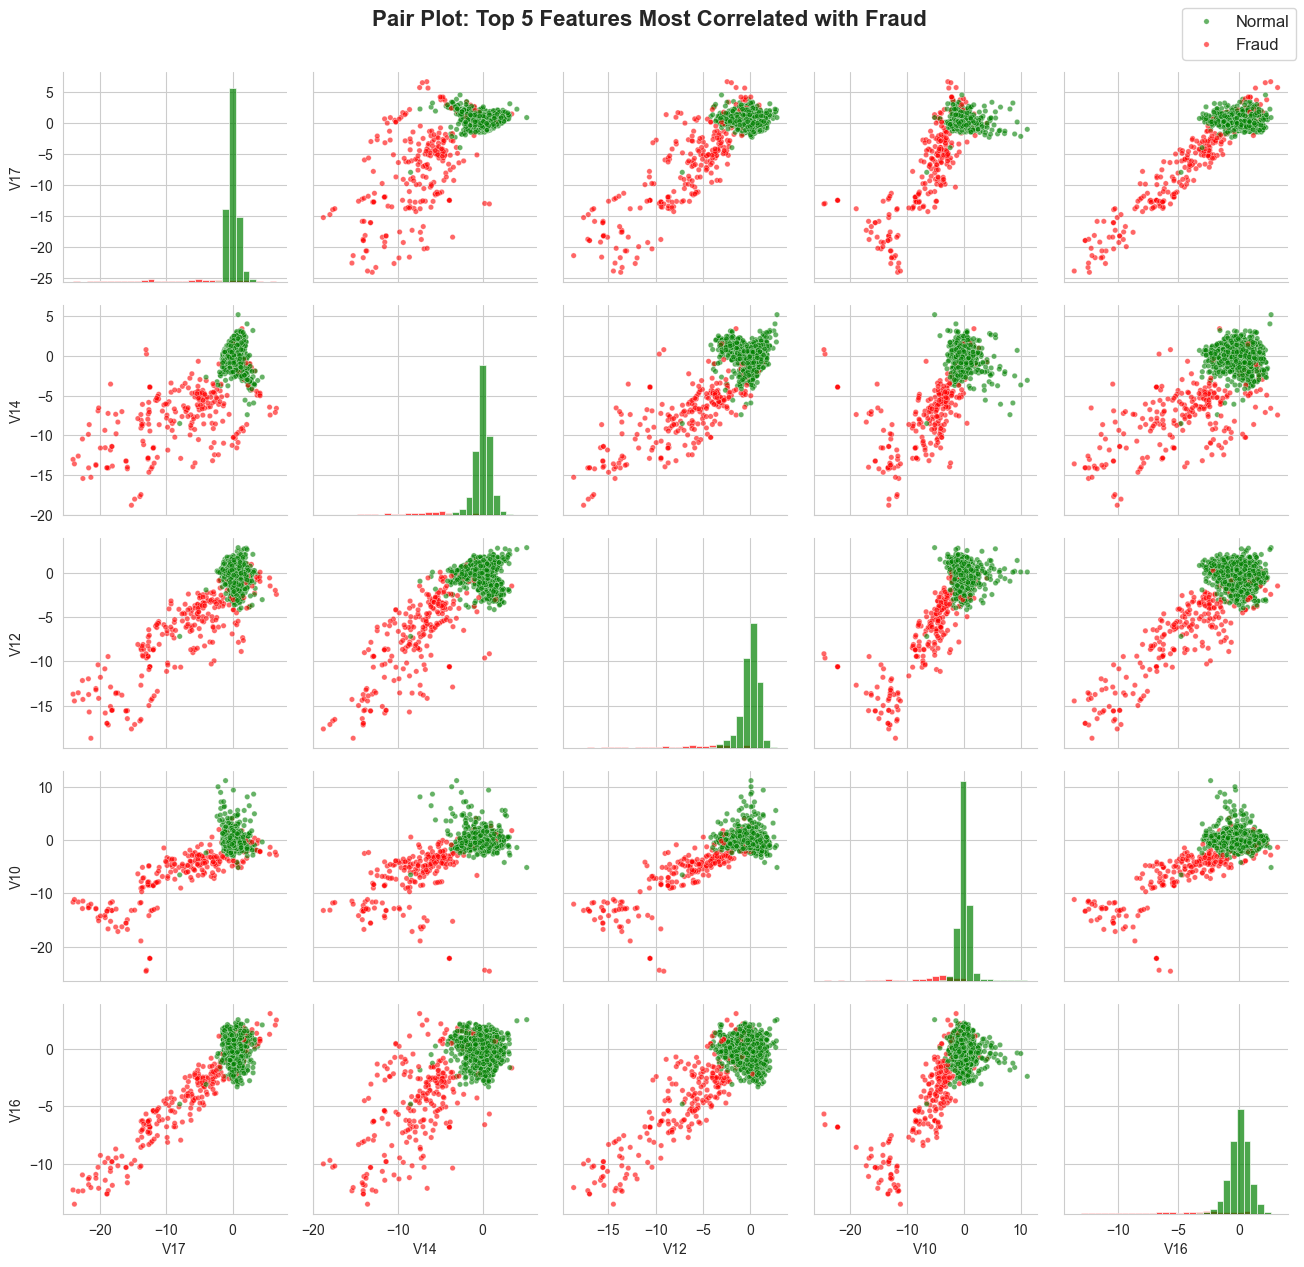

Visualization saved to: visualizations/pairplot_top_features.png


In [22]:
# Pair plot for top 5 most correlated features with fraud
top_fraud_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'Class']

# Create smaller sample for pair plot (for performance)
pair_plot_sample = sample_df[top_fraud_features].sample(n=min(3000, len(sample_df)), random_state=42)

print("Creating pair plot for top 5 features most correlated with fraud...")
print(f"Features: {', '.join(top_fraud_features[:-1])}")

# Create pair plot with custom colors
pair_plot = sns.pairplot(pair_plot_sample, 
                         hue='Class', 
                         palette={0: 'green', 1: 'red'},
                         diag_kind='hist',
                         plot_kws={'alpha': 0.6, 's': 15},
                         diag_kws={'alpha': 0.7, 'bins': 30})

pair_plot.fig.suptitle('Pair Plot: Top 5 Features Most Correlated with Fraud', 
                       y=1.01, fontsize=16, fontweight='bold')

# Customize legend
handles = pair_plot._legend_data.values()
labels = ['Normal', 'Fraud']
pair_plot._legend.remove()
pair_plot.fig.legend(handles=handles, labels=labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('visualizations/pairplot_top_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/pairplot_top_features.png")


Creating pair plot for mixed features (Amount + key PCA features)...
Features: Amount, V17, V14, V12, V11


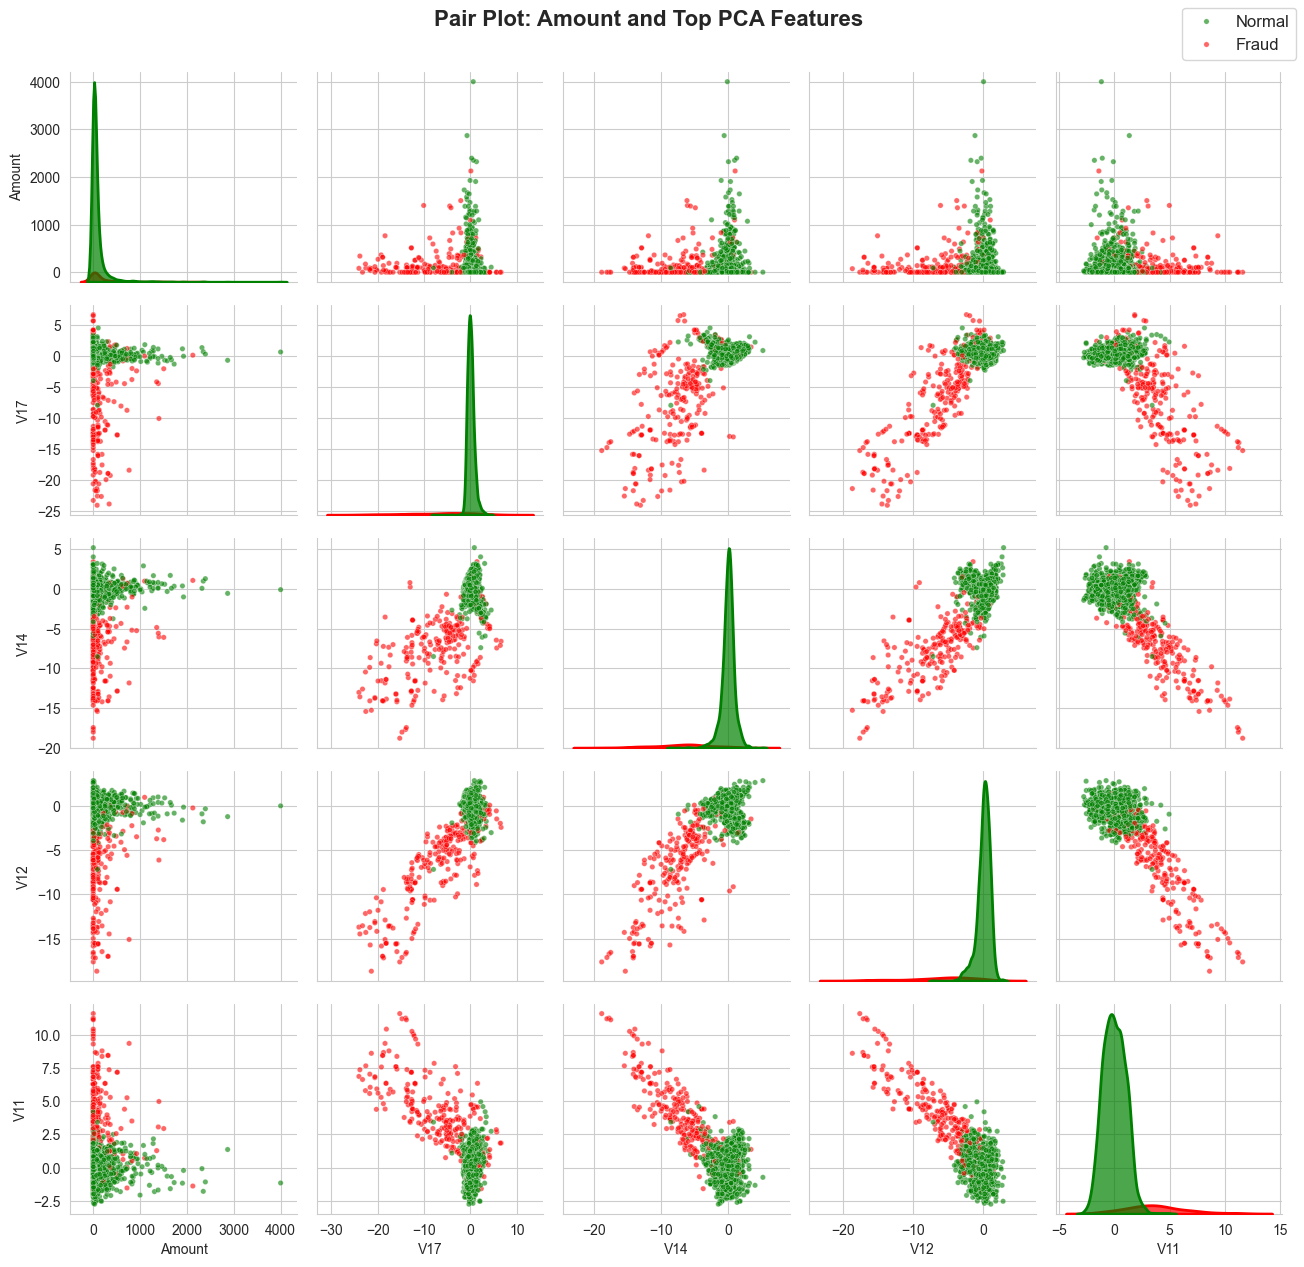

Visualization saved to: visualizations/pairplot_mixed_features.png


In [23]:
# Pair plot for key non-PCA features with some PCA features
mixed_features = ['Amount', 'V17', 'V14', 'V12', 'V11', 'Class']

# Create sample for mixed features pair plot
mixed_plot_sample = sample_df[mixed_features].sample(n=min(3000, len(sample_df)), random_state=42)

print("\nCreating pair plot for mixed features (Amount + key PCA features)...")
print(f"Features: {', '.join(mixed_features[:-1])}")

# Create pair plot
mixed_pair_plot = sns.pairplot(mixed_plot_sample, 
                               hue='Class', 
                               palette={0: 'green', 1: 'red'},
                               diag_kind='kde',
                               plot_kws={'alpha': 0.6, 's': 15},
                               diag_kws={'alpha': 0.7, 'linewidth': 2})

mixed_pair_plot.fig.suptitle('Pair Plot: Amount and Top PCA Features', 
                             y=1.01, fontsize=16, fontweight='bold')

# Customize legend
handles = mixed_pair_plot._legend_data.values()
labels = ['Normal', 'Fraud']
mixed_pair_plot._legend.remove()
mixed_pair_plot.fig.legend(handles=handles, labels=labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('visualizations/pairplot_mixed_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/pairplot_mixed_features.png")

##### 1.1.8.2 Multi-Feature Scatter Plot Matrix

Using pair plots (scatter plot matrices) to visualize relationships among multiple features simultaneously. This provides a comprehensive view of feature interactions and class separability.

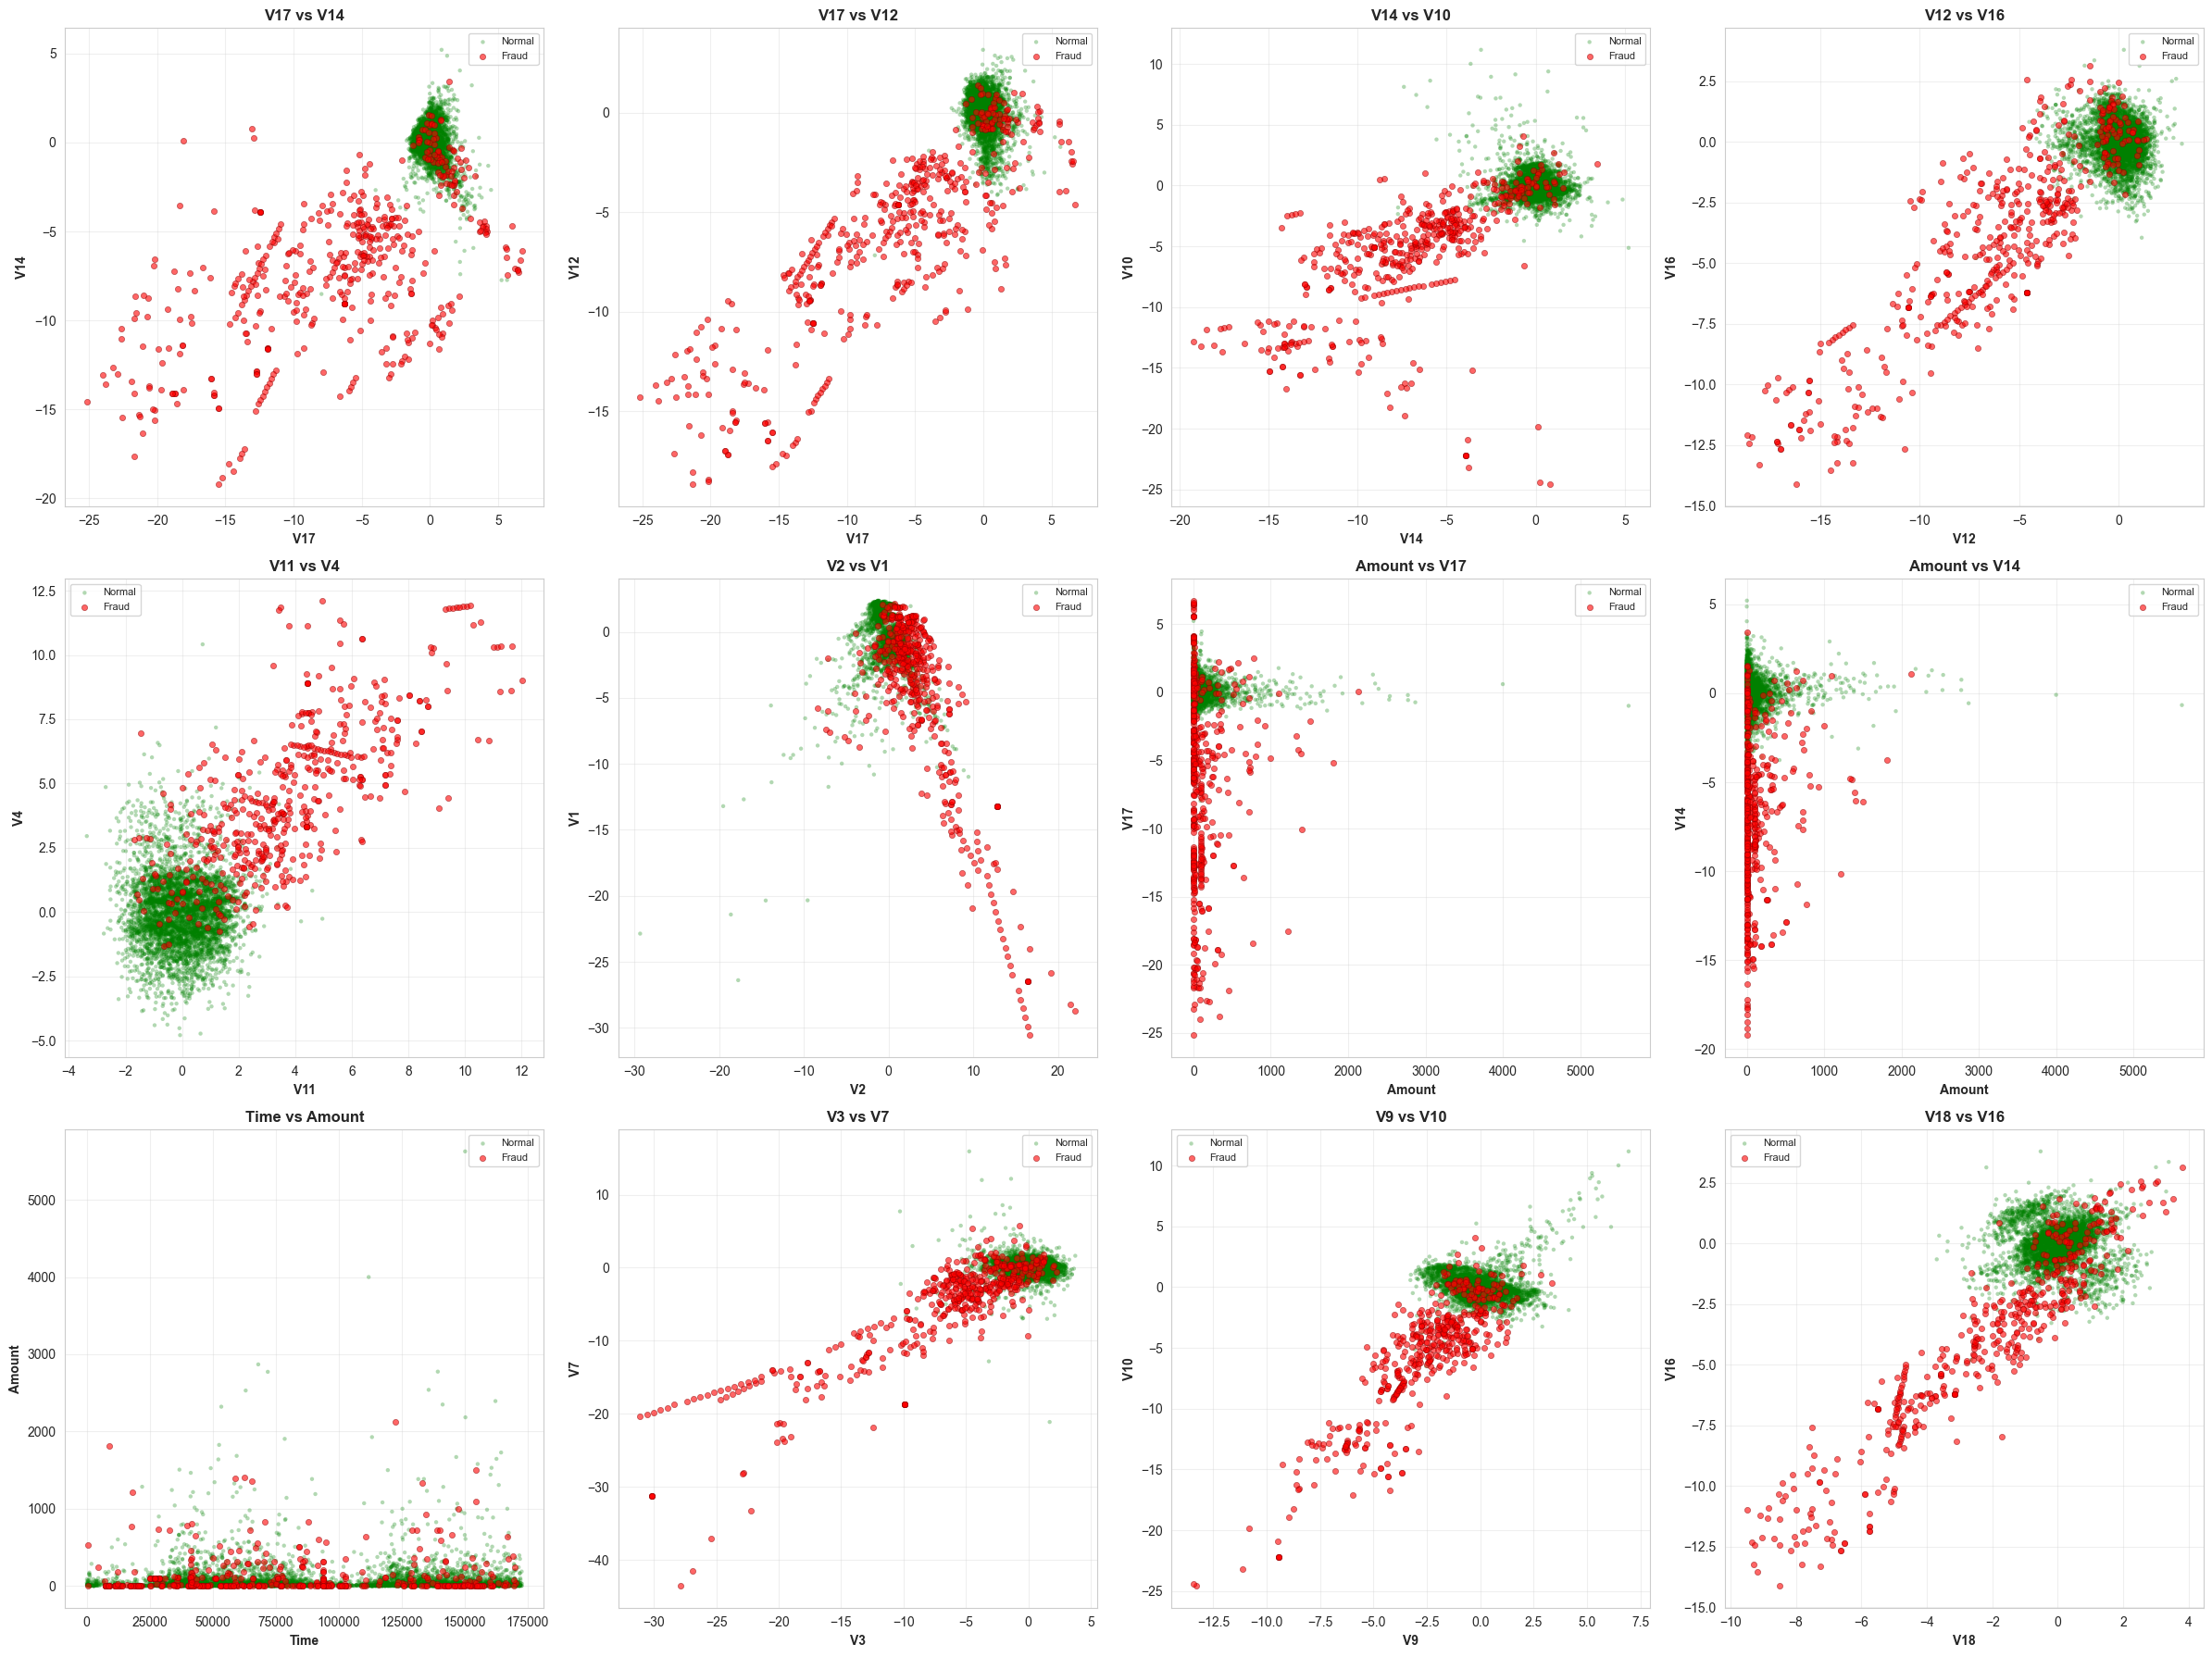

Visualization saved to: visualizations/pairwise_scatter_plots.png


In [24]:
# Scatter plots of key feature pairs
# Using most correlated features with fraud
feature_pairs = [
    ('V17', 'V14'),
    ('V17', 'V12'),
    ('V14', 'V10'),
    ('V12', 'V16'),
    ('V11', 'V4'),
    ('V2', 'V1'),
    ('Amount', 'V17'),
    ('Amount', 'V14'),
    ('Time', 'Amount'),
    ('V3', 'V7'),
    ('V9', 'V10'),
    ('V18', 'V16')
]

fig, axes = plt.subplots(3, 4, figsize=(24, 18))
axes = axes.ravel()

for idx, (feature_x, feature_y) in enumerate(feature_pairs):
    # Plot normal transactions first (green)
    normal_mask = sample_df['Class'] == 0
    fraud_mask = sample_df['Class'] == 1
    
    axes[idx].scatter(sample_df[normal_mask][feature_x], 
                     sample_df[normal_mask][feature_y],
                     c='green', alpha=0.3, s=10, label='Normal', edgecolors='none')
    
    # Plot fraud transactions on top (red) for visibility
    axes[idx].scatter(sample_df[fraud_mask][feature_x], 
                     sample_df[fraud_mask][feature_y],
                     c='red', alpha=0.6, s=20, label='Fraud', edgecolors='darkred', linewidths=0.5)
    
    axes[idx].set_xlabel(feature_x, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(feature_y, fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{feature_x} vs {feature_y}', fontsize=12, fontweight='bold')
    axes[idx].legend(loc='best', fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/pairwise_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/pairwise_scatter_plots.png")

##### 1.1.8.3 Detailed Feature Plot: V17 vs V14

V17 and V14 are the two most correlated features with fraud. This plot uses a larger sample to provide more detail on the relationship between these critical features.

Larger sample for V17 vs V14 detailed plot:
  Normal transactions: 20,000
  Fraudulent transactions: 492
  Total samples: 20,492


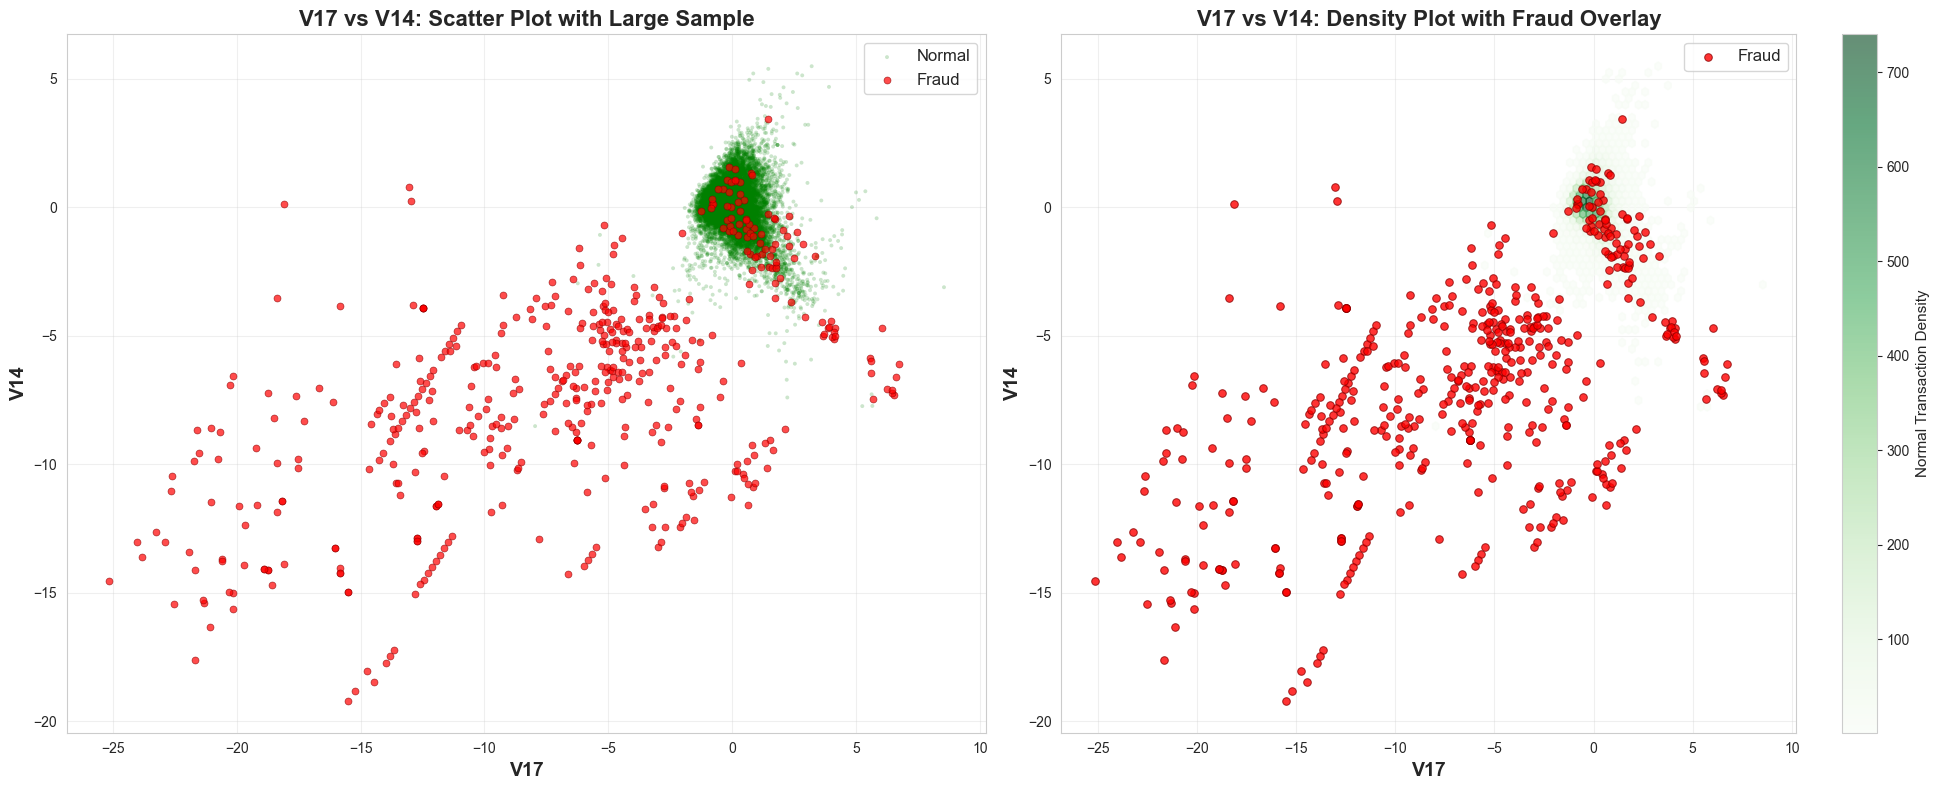


Visualization saved to: visualizations/v17_vs_v14_detailed.png

Key Observations:
  - V17 and V14 show the strongest correlation with fraud detection
  - Fraudulent transactions cluster in specific regions of the feature space
  - Clear separability between normal and fraudulent patterns


In [25]:
# Create larger sample for detailed V17 vs V14 plot
# Sample 20,000 normal transactions + all fraud transactions for better visualization
fraud_df_large = df[df['Class'] == 1]
normal_df_large = df[df['Class'] == 0].sample(n=20000, random_state=42)
large_sample_df = pd.concat([normal_df_large, fraud_df_large]).sample(frac=1, random_state=42)

print(f"Larger sample for V17 vs V14 detailed plot:")
print(f"  Normal transactions: {len(normal_df_large):,}")
print(f"  Fraudulent transactions: {len(fraud_df_large)}")
print(f"  Total samples: {len(large_sample_df):,}")

# Create detailed scatter plot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Standard scatter plot
normal_mask = large_sample_df['Class'] == 0
fraud_mask = large_sample_df['Class'] == 1

axes[0].scatter(large_sample_df[normal_mask]['V17'], 
               large_sample_df[normal_mask]['V14'],
               c='green', alpha=0.2, s=8, label='Normal', edgecolors='none')

axes[0].scatter(large_sample_df[fraud_mask]['V17'], 
               large_sample_df[fraud_mask]['V14'],
               c='red', alpha=0.7, s=25, label='Fraud', edgecolors='darkred', linewidths=0.5)

axes[0].set_xlabel('V17', fontsize=14, fontweight='bold')
axes[0].set_ylabel('V14', fontsize=14, fontweight='bold')
axes[0].set_title('V17 vs V14: Scatter Plot with Large Sample', fontsize=16, fontweight='bold')
axes[0].legend(loc='best', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Plot 2: Density/hexbin plot for normal transactions with fraud overlay
hb = axes[1].hexbin(large_sample_df[normal_mask]['V17'], 
                    large_sample_df[normal_mask]['V14'],
                    gridsize=50, cmap='Greens', alpha=0.6, mincnt=1)

axes[1].scatter(large_sample_df[fraud_mask]['V17'], 
               large_sample_df[fraud_mask]['V14'],
               c='red', alpha=0.8, s=30, label='Fraud', edgecolors='darkred', linewidths=0.7)

axes[1].set_xlabel('V17', fontsize=14, fontweight='bold')
axes[1].set_ylabel('V14', fontsize=14, fontweight='bold')
axes[1].set_title('V17 vs V14: Density Plot with Fraud Overlay', fontsize=16, fontweight='bold')
axes[1].legend(loc='best', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Add colorbar for hexbin
cb = plt.colorbar(hb, ax=axes[1])
cb.set_label('Normal Transaction Density', fontsize=11)

plt.tight_layout()
plt.savefig('visualizations/v17_vs_v14_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to: visualizations/v17_vs_v14_detailed.png")
print("\nKey Observations:")
print("  - V17 and V14 show the strongest correlation with fraud detection")
print("  - Fraudulent transactions cluster in specific regions of the feature space")
print("  - Clear separability between normal and fraudulent patterns")

### Section 1.2: Data Preprocessing Pipeline

In this section, we will:
- Select the target features (V17 and V14) for classification
- Handle missing values (if any)
- Scale features appropriately
- Address class imbalance using SMOTE
- Create train/test splits (both with and without preprocessing)

In [27]:
# Import additional libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Preprocessing libraries imported successfully!")

Preprocessing libraries imported successfully!


#### 1.2.1 Feature Selection

Based on the EDA, we'll use V17 and V14 as they show the strongest correlation with fraud detection.

In [28]:
# Select features for modeling
selected_features = ['V17', 'V14']
target = 'Class'

# Create feature matrix (X) and target vector (y)
X = df[selected_features].copy()
y = df[target].copy()

print("Feature Selection Complete:")
print("="*60)
print(f"Selected Features: {', '.join(selected_features)}")
print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")
print(f"\nFeature Statistics:")
display(X.describe())

Feature Selection Complete:
Selected Features: V17, V14
Feature Matrix Shape: (284807, 2)
Target Vector Shape: (284807,)

Feature Statistics:


,V17,V14
count,2.848070e+05,2.848070e+05
mean,-3.772171e-16,1.207294e-15
std,8.493371e-01,9.585956e-01
min,-2.516280e+01,-1.921433e+01
25%,-4.837483e-01,-4.255740e-01
50%,-6.567575e-02,5.060132e-02
75%,3.996750e-01,4.931498e-01
max,9.253526e+00,1.052677e+01


#### 1.2.2 Missing Value Analysis

Check if there are any missing values in our selected features.

In [29]:
# Check for missing values in selected features
print("Missing Values in Selected Features:")
print("="*60)
missing_in_features = X.isnull().sum()
print(missing_in_features)

if missing_in_features.sum() == 0:
    print("\n✓ No missing values detected in selected features!")
else:
    print(f"\n⚠ Total missing values: {missing_in_features.sum()}")
    print("Missing values will be handled in preprocessing.")

Missing Values in Selected Features:
V17    0
V14    0
dtype: int64

✓ No missing values detected in selected features!


#### 1.2.3 Train/Test Split (Without Preprocessing)

First, we create a train/test split without any preprocessing to establish a baseline.

In [30]:
# Train/test split without preprocessing (80/20 split with stratification)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train/Test Split (Without Preprocessing):")
print("="*60)
print(f"Training Set Size: {X_train_raw.shape[0]:,} samples")
print(f"Test Set Size: {X_test_raw.shape[0]:,} samples")
print(f"Feature Dimensions: {X_train_raw.shape[1]}")

print(f"\nClass Distribution in Training Set:")
train_class_dist = pd.Series(y_train_raw).value_counts()
print(f"  Normal (0): {train_class_dist[0]:,} ({train_class_dist[0]/len(y_train_raw)*100:.2f}%)")
print(f"  Fraud (1): {train_class_dist[1]:,} ({train_class_dist[1]/len(y_train_raw)*100:.2f}%)")

print(f"\nClass Distribution in Test Set:")
test_class_dist = pd.Series(y_test_raw).value_counts()
print(f"  Normal (0): {test_class_dist[0]:,} ({test_class_dist[0]/len(y_test_raw)*100:.2f}%)")
print(f"  Fraud (1): {test_class_dist[1]:,} ({test_class_dist[1]/len(y_test_raw)*100:.2f}%)")

Train/Test Split (Without Preprocessing):
Training Set Size: 227,845 samples
Test Set Size: 56,962 samples
Feature Dimensions: 2

Class Distribution in Training Set:
  Normal (0): 227,451 (99.83%)
  Fraud (1): 394 (0.17%)

Class Distribution in Test Set:
  Normal (0): 56,864 (99.83%)
  Fraud (1): 98 (0.17%)


#### 1.2.4 Feature Scaling

Since V17 and V14 are PCA-transformed features, they should already be relatively scaled. However, we'll
apply StandardScaler to ensure they have zero mean and unit variance for optimal model performance.

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

print("Feature Scaling Applied:")
print("="*60)
print("Method: StandardScaler (zero mean, unit variance)")
print(f"\nOriginal Training Set Statistics:")
print(f"  V17 - Mean: {X_train_raw['V17'].mean():.4f}, Std: {X_train_raw['V17'].std():.4f}")
print(f"  V14 - Mean: {X_train_raw['V14'].mean():.4f}, Std: {X_train_raw['V14'].std():.4f}")

print(f"\nScaled Training Set Statistics:")
print(f"  V17 - Mean: {X_train_scaled[:, 0].mean():.4f}, Std: {X_train_scaled[:, 0].std():.4f}")
print(f"  V14 - Mean: {X_train_scaled[:, 1].mean():.4f}, Std: {X_train_scaled[:, 1].std():.4f}")

print("\n✓ Features successfully scaled!")

#### 1.2.5 Remove Extreme Outliers

Before applying SMOTE, we'll remove extreme outliers that could negatively impact the synthetic sample
generation. We'll use the IQR method with a more aggressive threshold (3.0 * IQR) to remove only the most
extreme outliers while preserving the overall data distribution.

In [ ]:
# Function to detect extreme outliers using IQR method with custom threshold
def detect_extreme_outliers(data, target, threshold=3.0):
    """
    Detect extreme outliers using IQR method

    Parameters:
    - data: Feature data (numpy array or pandas DataFrame)
    - target: Target labels
    - threshold: Multiplier for IQR (default 3.0 for extreme outliers)

    Returns:
    - mask of non-outlier samples
    """
    # Convert to DataFrame for easier processing
    if isinstance(data, np.ndarray):
        df_temp = pd.DataFrame(data, columns=['V17', 'V14'])
    else:
        df_temp = data.copy()

    # Calculate IQR for each feature
    Q1 = df_temp.quantile(0.25)
    Q3 = df_temp.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for extreme outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Create mask for non-outliers (samples within bounds for ALL features)
    mask = ((df_temp >= lower_bound) & (df_temp <= upper_bound)).all(axis=1)

    return mask

# Store original size
original_train_size = X_train_scaled.shape[0]
original_y_train = y_train_raw.copy()

# Detect and remove extreme outliers from training set
print("Removing Extreme Outliers from Training Set:")
print("="*60)
print(f"Original training set size: {X_train_scaled.shape[0]:,} samples")

# Detect outliers (using 3.0 * IQR threshold)
outlier_mask = detect_extreme_outliers(X_train_scaled, y_train_raw, threshold=3.0)

# Apply mask to remove outliers
X_train_scaled_clean = X_train_scaled[outlier_mask]
y_train_clean = y_train_raw[outlier_mask].values

print(f"Training set size after outlier removal: {X_train_scaled_clean.shape[0]:,} samples")
print(f"Outliers removed: {original_train_size - X_train_scaled_clean.shape[0]:,} ({((original_train_size -
X_train_scaled_clean.shape[0])/original_train_size)*100:.2f}%)")

# Check class distribution after outlier removal
print(f"\nClass Distribution After Outlier Removal:")
clean_class_dist = pd.Series(y_train_clean).value_counts()
print(f"  Normal (0): {clean_class_dist[0]:,} ({clean_class_dist[0]/len(y_train_clean)*100:.2f}%)")
print(f"  Fraud (1): {clean_class_dist[1]:,} ({clean_class_dist[1]/len(y_train_clean)*100:.2f}%)")

print("\n✓ Extreme outliers successfully removed!")

##### 1.2.5.1 Visualize Outlier Removal

Let's visualize the effect of outlier removal on the feature space.

In [ ]:
# Visualize the effect of outlier removal
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Before outlier removal
normal_mask_before = original_y_train == 0
fraud_mask_before = original_y_train == 1

axes[0].scatter(X_train_scaled[normal_mask_before, 0], X_train_scaled[normal_mask_before, 1],
               c='green', alpha=0.3, s=10, label='Normal', edgecolors='none')
axes[0].scatter(X_train_scaled[fraud_mask_before, 0], X_train_scaled[fraud_mask_before, 1],
               c='red', alpha=0.7, s=25, label='Fraud', edgecolors='darkred', linewidths=0.5)

axes[0].set_xlabel('V17 (Scaled)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('V14 (Scaled)', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set Before Outlier Removal', fontsize=14, fontweight='bold')
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Add text annotation
axes[0].text(0.02, 0.98, f'Total Samples: {original_train_size:,}',
            transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: After outlier removal
normal_mask_after = y_train_clean == 0
fraud_mask_after = y_train_clean == 1

axes[1].scatter(X_train_scaled_clean[normal_mask_after, 0], X_train_scaled_clean[normal_mask_after, 1],
               c='green', alpha=0.3, s=10, label='Normal', edgecolors='none')
axes[1].scatter(X_train_scaled_clean[fraud_mask_after, 0], X_train_scaled_clean[fraud_mask_after, 1],
               c='red', alpha=0.7, s=25, label='Fraud', edgecolors='darkred', linewidths=0.5)

axes[1].set_xlabel('V17 (Scaled)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('V14 (Scaled)', fontsize=12, fontweight='bold')
axes[1].set_title('Training Set After Outlier Removal\n(Extreme Outliers Removed)', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Add text annotation
axes[1].text(0.02, 0.98, f'Total Samples: {X_train_scaled_clean.shape[0]:,}\nRemoved: {original_train_size - X_train_scaled_clean.shape[0]:,}',
            transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('visualizations/outlier_removal_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/outlier_removal_comparison.png")

#### 1.2.6 Addressing Class Imbalance with SMOTE

The dataset is highly imbalanced (577:1 ratio). We'll use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training set by generating synthetic samples of the minority class (fraud). We'll apply SMOTE to the cleaned dataset (after outlier removal) to ensure higher quality synthetic samples.

In [ ]:
# Check class distribution before SMOTE (using cleaned data)
print("Class Distribution Before SMOTE:")
print("="*60)
print(f"Class counts in cleaned training set: {Counter(y_train_clean)}")
print(f"Imbalance ratio: 1:{Counter(y_train_clean)[0] / Counter(y_train_clean)[1]:.2f}")

# Apply SMOTE to balance the cleaned training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled_clean, y_train_clean)

print(f"\nClass Distribution After SMOTE:")
print("="*60)
print(f"Class counts in balanced training set: {Counter(y_train_balanced)}")
print(f"New ratio: 1:{Counter(y_train_balanced)[0] / Counter(y_train_balanced)[1]:.2f}")

print(f"\nTraining Set Size Change:")
print(f"  Before SMOTE (after outlier removal): {X_train_scaled_clean.shape[0]:,} samples")
print(f"  After SMOTE: {X_train_balanced.shape[0]:,} samples")
print(f"  New fraud samples generated: {Counter(y_train_balanced)[1] - Counter(y_train_clean)[1]:,}")

print("\n✓ Class imbalance addressed using SMOTE!")

#### 1.2.7 Visualize SMOTE Effect

Let's visualize how SMOTE has affected the feature space by comparing the cleaned training set (after outlier removal) and the balanced training set (after SMOTE).

In [ ]:
# Visualize the effect of SMOTE on the feature space
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Cleaned training data (after outlier removal, before SMOTE)
normal_mask = y_train_clean == 0
fraud_mask = y_train_clean == 1

axes[0].scatter(X_train_scaled_clean[normal_mask, 0], X_train_scaled_clean[normal_mask, 1],
               c='green', alpha=0.3, s=10, label='Normal', edgecolors='none')
axes[0].scatter(X_train_scaled_clean[fraud_mask, 0], X_train_scaled_clean[fraud_mask, 1],
               c='red', alpha=0.7, s=25, label='Fraud', edgecolors='darkred', linewidths=0.5)

axes[0].set_xlabel('V17 (Scaled)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('V14 (Scaled)', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set Before SMOTE\n(Cleaned, Highly Imbalanced)', fontsize=14, fontweight='bold')
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Add text annotation with counts
axes[0].text(0.02, 0.98, f'Normal: {Counter(y_train_clean)[0]:,}\nFraud: {Counter(y_train_clean)[1]:,}',
            transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: Balanced training data (after SMOTE)
balanced_normal_mask = y_train_balanced == 0
balanced_fraud_mask = y_train_balanced == 1

axes[1].scatter(X_train_balanced[balanced_normal_mask, 0], X_train_balanced[balanced_normal_mask, 1],
               c='green', alpha=0.3, s=10, label='Normal', edgecolors='none')
axes[1].scatter(X_train_balanced[balanced_fraud_mask, 0], X_train_balanced[balanced_fraud_mask, 1],
               c='red', alpha=0.5, s=15, label='Fraud (Original + Synthetic)', edgecolors='darkred', linewidths=0.3)

axes[1].set_xlabel('V17 (Scaled)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('V14 (Scaled)', fontsize=12, fontweight='bold')
axes[1].set_title('Training Set After SMOTE\n(Balanced)', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Add text annotation with counts
axes[1].text(0.02, 0.98, f'Normal: {Counter(y_train_balanced)[0]:,}\nFraud: {Counter(y_train_balanced)[1]:,}',
            transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('visualizations/smote_effect_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to: visualizations/smote_effect_comparison.png")

#### 1.2.8 Final Data Summary

Summary of all preprocessing steps and final datasets ready for modeling.

In [ ]:
# Summary of preprocessing pipeline
print("="*70)
print("DATA PREPROCESSING SUMMARY")
print("="*70)

print("\n1. FEATURE SELECTION:")
print(f"   - Selected Features: V17, V14")
print(f"   - Reason: Highest correlation with fraud detection")
print(f"   - Correlation with fraud: V17 ({target_correlation['V17']:.4f}), V14 ({target_correlation['V14']:.4f})")

print("\n2. MISSING VALUES:")
print(f"   - No missing values in selected features")

print("\n3. DATA SPLITS:")
print(f"   - Split ratio: 80% train / 20% test")
print(f"   - Stratification: Yes (maintains class distribution)")

print("\n4. FEATURE SCALING:")
print(f"   - Method: StandardScaler")
print(f"   - Applied to: Training and test sets")
print(f"   - Result: Zero mean, unit variance")

print("\n5. OUTLIER REMOVAL:")
print(f"   - Method: IQR with 3.0 * IQR threshold (extreme outliers only)")
print(f"   - Applied to: Training set only")
print(f"   - Samples removed: {original_train_size - X_train_scaled_clean.shape[0]:,} ({((original_train_size - X_train_scaled_clean.shape[0])/original_train_size)*100:.2f}%)")
print(f"   - Cleaned training set size: {X_train_scaled_clean.shape[0]:,}")

print("\n6. CLASS IMBALANCE:")
print(f"   - Original imbalance ratio: 1:577.88")
print(f"   - Method: SMOTE (Synthetic Minority Over-sampling)")
print(f"   - Applied after outlier removal")
print(f"   - Balanced ratio: 1:1.00")

print("\n7. FINAL DATASETS:")
print(f"\n   WITHOUT PREPROCESSING:")
print(f"   - X_train_raw: {X_train_raw.shape}")
print(f"   - X_test_raw: {X_test_raw.shape}")
print(f"   - y_train_raw: {y_train_raw.shape}")
print(f"   - y_test_raw: {y_test_raw.shape}")

print(f"\n   WITH PREPROCESSING (Scaled, Not Balanced):")
print(f"   - X_train_scaled: {X_train_scaled.shape}")
print(f"   - X_test_scaled: {X_test_scaled.shape}")
print(f"   - y_train_raw: {y_train_raw.shape}")
print(f"   - y_test_raw: {y_test_raw.shape}")

print(f"\n   WITH PREPROCESSING (Scaled + Outliers Removed, Not Balanced):")
print(f"   - X_train_scaled_clean: {X_train_scaled_clean.shape}")
print(f"   - X_test_scaled: {X_test_scaled.shape}")
print(f"   - y_train_clean: {y_train_clean.shape}")
print(f"   - y_test_raw: {y_test_raw.shape}")

print(f"\n   WITH FULL PREPROCESSING (Scaled + Outliers Removed + SMOTE Balanced):")
print(f"   - X_train_balanced: {X_train_balanced.shape}")
print(f"   - X_test_scaled: {X_test_scaled.shape}")
print(f"   - y_train_balanced: {y_train_balanced.shape}")
print(f"   - y_test_raw: {y_test_raw.shape}")

print("\n" + "="*70)
print("PREPROCESSING COMPLETED - Ready for Model Training (Section 2)")
print("="*70)